In [5]:
#Project sidewalk data
#All severity
#Seveirty 5
#Spatial join to block group
#get count for labels per blockgroup
# Get Sidewalk data
#Spatial join to block group
#get sidewalk lenght for block group
#Divide label count/ sidewalk length

In [37]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [38]:
labels = pd.read_csv("SeattleData/access_attributes.csv")
labels.head()

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,Attribute Latitude,Attribute Longitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.32030,3.0,False,0,0,1
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.32189,1.0,False,2,0,0
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.32210,1.0,False,2,1,0
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.32017,1.0,False,1,0,0
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.32120,1.0,False,2,0,0


In [39]:
#create labels geo dataframe
labels = labels.rename(columns={'Attribute Latitude': 'latitude', 'Attribute Longitude': 'longtitude'})
points = labels.apply(lambda row: Point(row.longtitude, row.latitude), axis=1)
labels_geo = gpd.GeoDataFrame(labels, geometry=points)
labels_geo.crs = {'init': 'epsg:4326'}
labels_geo

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1,POINT (-122.32030 47.64312)
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0,POINT (-122.32189 47.64326)
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0,POINT (-122.32210 47.64312)
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0,POINT (-122.32017 47.64315)
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.321200,1.0,False,2,0,0,POINT (-122.32120 47.65138)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93757,59103771,Crosswalk,3338,6394365,Greenwood,47.686950,-122.360530,5.0,False,4,0,0,POINT (-122.36053 47.68695)
93758,59103773,Crosswalk,25421,465991369,Greenwood,47.690610,-122.356500,1.0,False,4,0,0,POINT (-122.35650 47.69061)
93759,59103776,Crosswalk,25422,465991369,Greenwood,47.690613,-122.356804,1.0,False,4,0,0,POINT (-122.35680 47.69061)
93760,59103777,Crosswalk,5047,6428527,Greenwood,47.686222,-122.357050,1.0,False,4,0,0,POINT (-122.35705 47.68622)


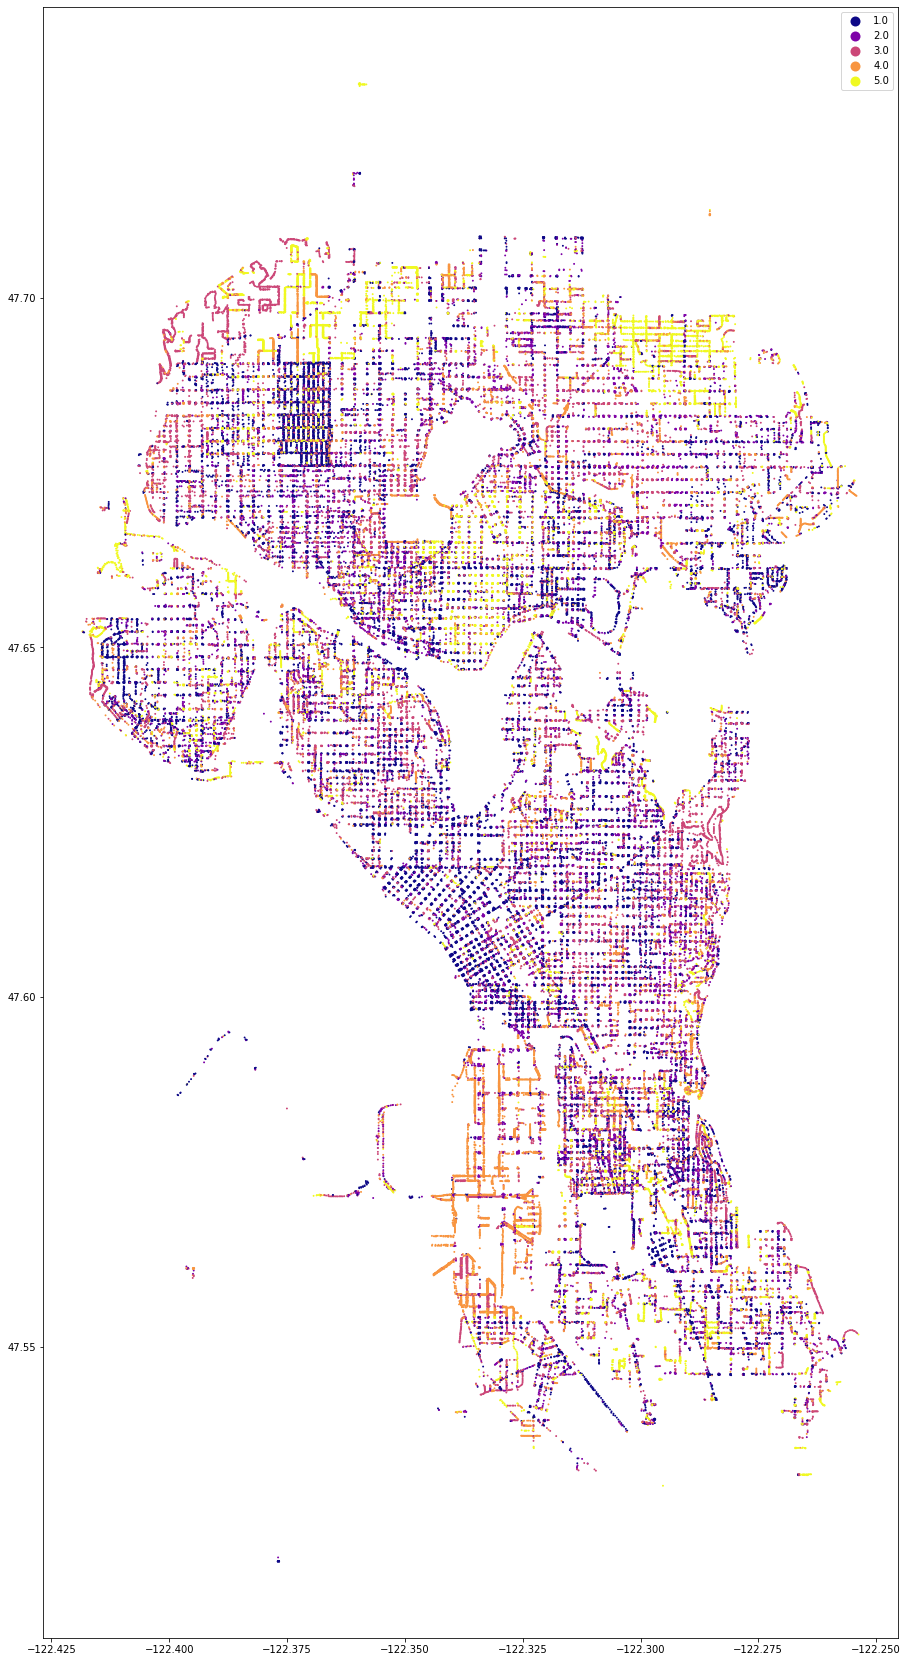

In [146]:
#plotting labels by severity level
labels_geo.plot(column='Severity',figsize=(50, 30),cmap='plasma', legend=True,categorical =True, markersize=0.8)

In [20]:
#census blockgroup data

In [24]:
bg = gpd.read_file('SeattleData/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.1,100.1,588.283002,221.041200,367.285577,NaN,21168.918543,2.562561e+07,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.2,100.2,71.258030,71.263215,0.000000,NaN,8692.089186,3.104000e+06,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.3,100.3,91.604629,91.611355,0.000000,NaN,8560.645769,3.990298e+06,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.4,100.4,31.237245,31.239309,0.000000,NaN,4693.439609,1.360694e+06,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.5,100.5,56.956546,56.960756,0.000000,NaN,7450.759251,2.481027e+06,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [ ]:
#check crs types before spatial join

In [30]:
print(bg.crs)
print(labels_geo.crs)

epsg:4326
+init=epsg:4326 +type=crs


In [32]:
labels_geo = labels_geo.to_crs(4326)

In [33]:
labels_per_bg=labels_geo.sjoin(bg, op="within")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
labels_per_bg

,Attribute ID,Label Type,Street ID,OSM Street ID,Neighborhood Name,latitude,longtitude,Severity,Temporary,Agree Count,Disagree Count,Not Sure Count,geometry,index_right,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,False,0,0,1,POINT (-122.32030 47.64312),226,227,006100,2,530330061002,Block Group 2,+47.6442656,-122.3156489,6100,6100.2,6100.2,149.686523,117.364925,32.329785,NaN,15037.652919,6.520345e+06
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,False,2,0,0,POINT (-122.32189 47.64326),226,227,006100,2,530330061002,Block Group 2,+47.6442656,-122.3156489,6100,6100.2,6100.2,149.686523,117.364925,32.329785,NaN,15037.652919,6.520345e+06
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.322100,1.0,False,2,1,0,POINT (-122.32210 47.64312),226,227,006100,2,530330061002,Block Group 2,+47.6442656,-122.3156489,6100,6100.2,6100.2,149.686523,117.364925,32.329785,NaN,15037.652919,6.520345e+06
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.320170,1.0,False,1,0,0,POINT (-122.32017 47.64315),226,227,006100,2,530330061002,Block Group 2,+47.6442656,-122.3156489,6100,6100.2,6100.2,149.686523,117.364925,32.329785,NaN,15037.652919,6.520345e+06
11,57259664,CurbRamp,9199,6497555,Portage Bay,47.644516,-122.322014,2.0,False,2,0,0,POINT (-122.32201 47.64452),226,227,006100,2,530330061002,Block Group 2,+47.6442656,-122.3156489,6100,6100.2,6100.2,149.686523,117.364925,32.329785,NaN,15037.652919,6.520345e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93142,59100421,NoSidewalk,17317,161318536,North College Park,47.722054,-122.332080,NaN,False,0,0,0,POINT (-122.33208 47.72205),23,24,000600,1,530330006001,Block Group 1,+47.7251219,-122.3365251,600,600.1,600.1,222.589518,222.605871,0.000000,NaN,14009.640956,9.695999e+06
63726,59034261,CurbRamp,23575,428088699,Maple Leaf,47.708607,-122.312230,1.0,False,1,0,0,POINT (-122.31223 47.70861),39,40,001100,1,530330011001,Block Group 1,+47.7092748,-122.3057238,1100,1100.1,1100.1,124.796691,124.804773,0.000000,NaN,11798.584233,5.436144e+06
87198,59034265,CurbRamp,25674,486243422,Maple Leaf,47.708645,-122.312320,1.0,False,1,0,0,POINT (-122.31232 47.70865),39,40,001100,1,530330011001,Block Group 1,+47.7092748,-122.3057238,1100,1100.1,1100.1,124.796691,124.804773,0.000000,NaN,11798.584233,5.436144e+06
86456,58912417,NoSidewalk,14201,53621395,Georgetown,47.530087,-122.295235,5.0,False,0,0,0,POINT (-122.29524 47.53009),476,477,011700,2,530330117002,Block Group 2,+47.5195872,-122.2875646,11700,11700.2,11700.2,392.018423,392.023050,0.000000,NaN,25580.350406,1.707632e+07


In [46]:
s_all=labels_per_bg.groupby(by=["GEOID10"]).count()

In [47]:
s_all= s_all['Severity'].reset_index().rename(columns={'Severity': 'labels_all_count'})

In [48]:
s_all

,GEOID10,labels_all_count
0,530330004012,16
1,530330004023,1
2,530330004024,19
3,530330005002,6
4,530330006001,0
...,...,...
361,530330114023,5
362,530330116004,5
363,530330117002,1
364,530330118001,9


In [65]:
s5 = labels_per_bg.loc[labels_per_bg['Severity'] == 5.0]
s4 = labels_per_bg.loc[labels_per_bg['Severity'] == 4.0]
s3 = labels_per_bg.loc[labels_per_bg['Severity'] == 3.0]
s2 = labels_per_bg.loc[labels_per_bg['Severity'] == 2.0]
s1 = labels_per_bg.loc[labels_per_bg['Severity'] == 1.0]

In [66]:
s5=s5.groupby(by=["GEOID10"]).count()
s4=s4.groupby(by=["GEOID10"]).count()
s3=s3.groupby(by=["GEOID10"]).count()
s2=s2.groupby(by=["GEOID10"]).count()
s1=s1.groupby(by=["GEOID10"]).count()

In [67]:
s5= s5['Severity'].reset_index().rename(columns={'Severity': 'labels_s5_count'})
s4= s4['Severity'].reset_index().rename(columns={'Severity': 'labels_s4_count'})
s3= s3['Severity'].reset_index().rename(columns={'Severity': 'labels_s3_count'})
s2= s2['Severity'].reset_index().rename(columns={'Severity': 'labels_s2_count'})
s1= s1['Severity'].reset_index().rename(columns={'Severity': 'labels_s1_count'})

In [71]:
labels_count_per_bg = s_all.merge(s5, how='outer', on='GEOID10').merge(s4, how='outer', on='GEOID10').merge(s3, how='outer', on='GEOID10').merge(s2, how='outer', on='GEOID10').merge(s1, how='outer', on='GEOID10')
labels_count_per_bg = labels_count_per_bg.fillna(0)

In [72]:
labels_count_per_bg

,GEOID10,labels_all_count,labels_s5_count,labels_s4_count,labels_s3_count,labels_s2_count,labels_s1_count
0,530330004012,16,16.0,0.0,0.0,0.0,0.0
1,530330004023,1,0.0,0.0,1.0,0.0,0.0
2,530330004024,19,0.0,0.0,0.0,12.0,7.0
3,530330005002,6,2.0,0.0,2.0,2.0,0.0
4,530330006001,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
361,530330114023,5,0.0,0.0,0.0,0.0,5.0
362,530330116004,5,0.0,0.0,0.0,1.0,4.0
363,530330117002,1,1.0,0.0,0.0,0.0,0.0
364,530330118001,9,7.0,0.0,1.0,0.0,1.0


In [73]:
# Get street data
#Spatial join to block group

In [107]:
s = gpd.read_file('SeattleData/Seattle_Streets/Seattle_Streets.shp')
s.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIP,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWID,SURFACETYP,SURFACET_1,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYS,STREETTYPE,PVMTCONDIN,PVMTCOND_1,TRANCLASS,TRANDESCRI,SLOPE_PCT,PVMTCATEGO,PARKBOULEV,SHAPE_Leng,geometry
0,1,2.0,1006,00010,0120,000100120,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,None,INSVC,1200.0,25.0,NW,N,None,None,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050,"LINESTRING (-122.33754 47.60612, -122.33820 47..."
1,2,2.0,1009,00010,0150,000100150,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,None,INSVC,1500.0,25.0,NW,N,None,None,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562,"LINESTRING (-122.34001 47.60882, -122.34092 47..."
2,3,0.0,1032,00015,0080,000150080,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,None,INSVC,800.0,20.0,N,N,None,None,297.0,0.0,PCC,None,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592,"LINESTRING (-122.35538 47.62637, -122.35538 47..."
3,4,0.0,1051,00015,0230,000150230,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,None,INSVC,2200.0,20.0,N,N,None,None,175.0,25.0,AC,None,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983,"LINESTRING (-122.35558 47.63912, -122.35557 47..."
4,5,0.0,1060,00015,0282,000150282,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,None,INSVC,2800.0,20.0,N,N,None,None,73.0,0.0,PCC,None,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708,"LINESTRING (-122.35553 47.64562, -122.35553 47..."


In [108]:
#drop Interstate freeway and state highways
street = s[s['ARTCLASS'] != 5]
street = street[street['ARTCLASS'] != 4]
street.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIP,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWID,SURFACETYP,SURFACET_1,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYS,STREETTYPE,PVMTCONDIN,PVMTCOND_1,TRANCLASS,TRANDESCRI,SLOPE_PCT,PVMTCATEGO,PARKBOULEV,SHAPE_Leng,geometry
0,1,2.0,1006,00010,0120,000100120,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,None,INSVC,1200.0,25.0,NW,N,None,None,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050,"LINESTRING (-122.33754 47.60612, -122.33820 47..."
1,2,2.0,1009,00010,0150,000100150,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,None,INSVC,1500.0,25.0,NW,N,None,None,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562,"LINESTRING (-122.34001 47.60882, -122.34092 47..."
2,3,0.0,1032,00015,0080,000150080,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,None,INSVC,800.0,20.0,N,N,None,None,297.0,0.0,PCC,None,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592,"LINESTRING (-122.35538 47.62637, -122.35538 47..."
3,4,0.0,1051,00015,0230,000150230,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,None,INSVC,2200.0,20.0,N,N,None,None,175.0,25.0,AC,None,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983,"LINESTRING (-122.35558 47.63912, -122.35557 47..."
4,5,0.0,1060,00015,0282,000150282,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,None,INSVC,2800.0,20.0,N,N,None,None,73.0,0.0,PCC,None,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708,"LINESTRING (-122.35553 47.64562, -122.35553 47..."


In [92]:
#street.explore(tooltip = "STREETTYPE")

In [109]:
streets_per_bg=street.sjoin(bg, op="within")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [110]:
#group by census block
streets_per_bg=streets_per_bg.groupby(by=["GEOID10"]).sum()

In [111]:
streets_per_bg = streets_per_bg['SEGLENGTH']

In [112]:
streets_per_bg =streets_per_bg.reset_index().rename(columns={'SEGLENGTH': 'street_length'})
#feet

In [113]:
streets_per_bg.head()

,GEOID10,street_length
0,530330001001,18360.647342
1,530330001002,6352.000000
2,530330001003,4150.000000
3,530330001004,1334.000000
4,530330001005,4796.000000


In [ ]:
#merge back to labels df to get normalized label count

In [139]:
df = labels_count_per_bg.merge(streets_per_bg, how='outer', on='GEOID10').fillna(0)

In [140]:
df

,GEOID10,labels_all_count,labels_s5_count,labels_s4_count,labels_s3_count,labels_s2_count,labels_s1_count,street_length
0,530330004012,16.0,16.0,0.0,0.0,0.0,0.0,13731.0
1,530330004023,1.0,0.0,0.0,1.0,0.0,0.0,9029.0
2,530330004024,19.0,0.0,0.0,0.0,12.0,7.0,11422.0
3,530330005002,6.0,2.0,0.0,2.0,2.0,0.0,15440.0
4,530330006001,0.0,0.0,0.0,0.0,0.0,0.0,17349.0
...,...,...,...,...,...,...,...,...
472,530330120001,0.0,0.0,0.0,0.0,0.0,0.0,17458.0
473,530330120002,0.0,0.0,0.0,0.0,0.0,0.0,15297.0
474,530330120003,0.0,0.0,0.0,0.0,0.0,0.0,14930.0
475,530330121001,0.0,0.0,0.0,0.0,0.0,0.0,14383.0


In [141]:
df['labels_all_per_ft'] = df['labels_all_count']/df['street_length']
df['labels_s1_per_ft'] = df['labels_s1_count']/df['street_length']
df['labels_s2_per_ft'] = df['labels_s2_count']/df['street_length']
df['labels_s3_per_ft'] = df['labels_s3_count']/df['street_length']
df['labels_s4_per_ft'] = df['labels_s4_count']/df['street_length']
df['labels_s5_per_ft'] = df['labels_s5_count']/df['street_length']

In [142]:
df

,GEOID10,labels_all_count,labels_s5_count,labels_s4_count,labels_s3_count,labels_s2_count,labels_s1_count,street_length,labels_all_per_ft,labels_s1_per_ft,labels_s2_per_ft,labels_s3_per_ft,labels_s4_per_ft,labels_s5_per_ft
0,530330004012,16.0,16.0,0.0,0.0,0.0,0.0,13731.0,0.001165,0.000000,0.000000,0.000000,0.0,0.001165
1,530330004023,1.0,0.0,0.0,1.0,0.0,0.0,9029.0,0.000111,0.000000,0.000000,0.000111,0.0,0.000000
2,530330004024,19.0,0.0,0.0,0.0,12.0,7.0,11422.0,0.001663,0.000613,0.001051,0.000000,0.0,0.000000
3,530330005002,6.0,2.0,0.0,2.0,2.0,0.0,15440.0,0.000389,0.000000,0.000130,0.000130,0.0,0.000130
4,530330006001,0.0,0.0,0.0,0.0,0.0,0.0,17349.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,530330120001,0.0,0.0,0.0,0.0,0.0,0.0,17458.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
473,530330120002,0.0,0.0,0.0,0.0,0.0,0.0,15297.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
474,530330120003,0.0,0.0,0.0,0.0,0.0,0.0,14930.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
475,530330121001,0.0,0.0,0.0,0.0,0.0,0.0,14383.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [143]:
df = df.dropna()

In [144]:
df.to_csv('SeattleData/SeattleNormalizedSidewalkLabelCounts.csv',index=False)

In [138]:
d = pd.read_csv("SeattleData/SeattleNormalizedSidewalkLabelCounts.csv")
d

,GEOID10,labels_all_count,labels_s5_count,labels_s4_count,labels_s3_count,labels_s2_count,labels_s1_count,street_length,labels_all_per_ft,labels_s5_per_ft,labels_s4_per_ft,labels_s3_per_ft,labels_s2_per_ft,labels_s1_per_ft
0,530330004012,16.0,16.0,0.0,0.0,0.0,0.0,13731.0,0.001165,0.001165,0.0,0.000000,0.000000,0.000000
1,530330004023,1.0,0.0,0.0,1.0,0.0,0.0,9029.0,0.000111,0.000000,0.0,0.000111,0.000000,0.000000
2,530330004024,19.0,0.0,0.0,0.0,12.0,7.0,11422.0,0.001663,0.000000,0.0,0.000000,0.001051,0.000613
3,530330005002,6.0,2.0,0.0,2.0,2.0,0.0,15440.0,0.000389,0.000130,0.0,0.000130,0.000130,0.000000
4,530330006001,0.0,0.0,0.0,0.0,0.0,0.0,17349.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,530330120001,0.0,0.0,0.0,0.0,0.0,0.0,17458.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
472,530330120002,0.0,0.0,0.0,0.0,0.0,0.0,15297.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
473,530330120003,0.0,0.0,0.0,0.0,0.0,0.0,14930.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
474,530330121001,0.0,0.0,0.0,0.0,0.0,0.0,14383.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [145]:
labels_geo.to_file("SeattleData/LabelsGeo.shp")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.
